Mounted at /content/drive
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=b657cd91df2bfb36e04f092b3f51ae552403f72a33d92728e1850486fe514987
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb
importing Jupyter notebook from TransmissionBB84DecoyStateComputeSKRcontinuousphase.ipynb
importing Jupyter notebook from TransmissionBB84DecoyStateComputeSKRdiscretephase.ipynb
importing Jupyter notebook from PrecisionElementsTransmissionBB84DecoyStateComputeSKRdiscretephase.ipynb
importing Jupyter notebook from TransmissionContinuousVariablesComputeSKR.ipynb
importing Jupyter notebook from PrecisionElementsTransmissionContinousVariablesComputeSKR.ipynb


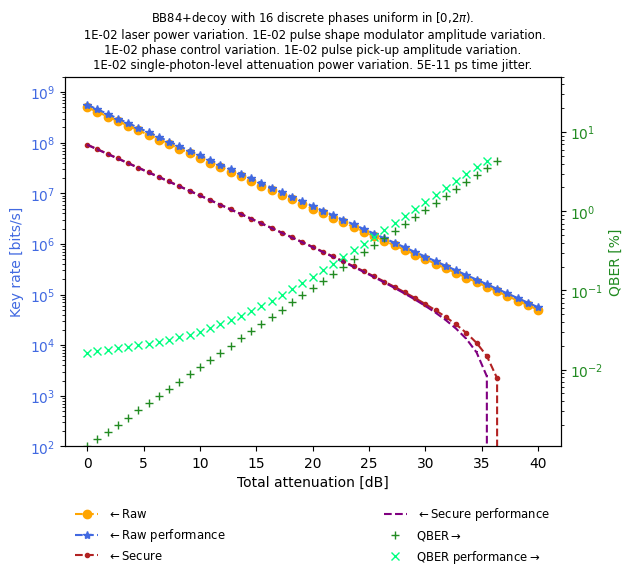

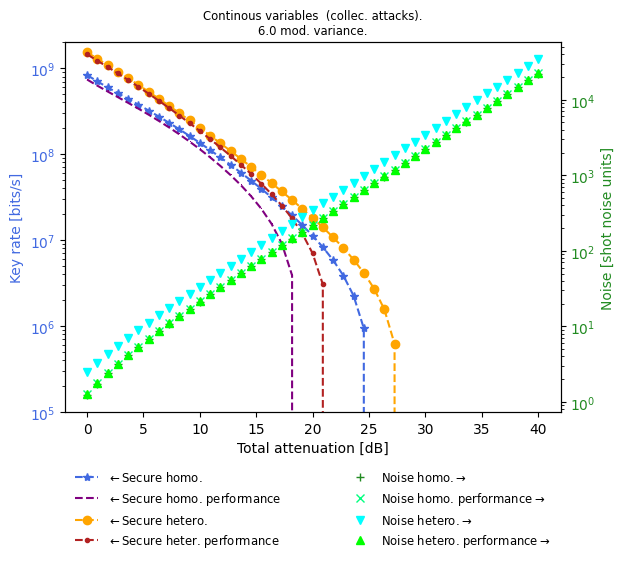

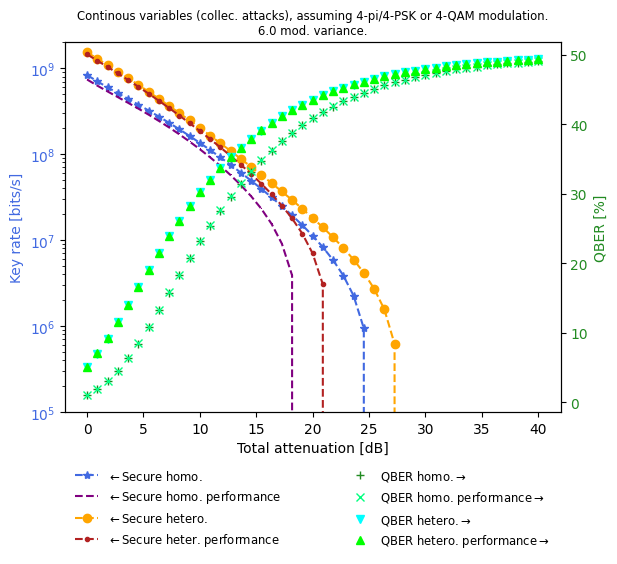

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 16 19:08:43 2019
 
@author: mjofre
"""
###############################################################################
# Scripts to assess the secure key rate of DV-QKD and CV-QKD
# There might be commercial solutions available, such as: https://www.vpiphotonics.com/Tools/QKD/
###############################################################################

import os, sys
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import matplotlib.style
import matplotlib as mpl
#print(plt.style.available)
mpl.style.use('default')

try:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True) 
  !pip install import-ipynb
  import import_ipynb
  sys.path.append('/content/drive/My Drive/Quside/PythonSimCalc/')
  !cp -r "/content/drive/My Drive/Quside/PythonSimCalc/TransmissionBB84DecoyStateComputeSKRcontinuousphase.ipynb" '/content/'
  !cp -r "/content/drive/My Drive/Quside/PythonSimCalc/TransmissionBB84DecoyStateComputeSKRdiscretephase.ipynb" '/content/'
  !cp -r "/content/drive/My Drive/Quside/PythonSimCalc/PrecisionElementsTransmissionBB84DecoyStateComputeSKRdiscretephase.ipynb" '/content/'
  !cp -r "/content/drive/My Drive/Quside/PythonSimCalc/TransmissionContinuousVariablesComputeSKR.ipynb" '/content/'
  !cp -r "/content/drive/My Drive/Quside/PythonSimCalc/PrecisionElementsTransmissionContinousVariablesComputeSKR.ipynb" '/content/'
except:
  print('Google drive paths not loaded')
  module_path = os.path.abspath('C:/qusideqkd/Calculations')
  sys.path.append(module_path)
  module_path = os.path.abspath('D:/qusideqkd/Calculations')
  sys.path.append(module_path)

import TransmissionBB84DecoyStateComputeSKRcontinuousphase
import TransmissionBB84DecoyStateComputeSKRdiscretephase
import PrecisionElementsTransmissionBB84DecoyStateComputeSKRdiscretephase
import TransmissionContinuousVariablesComputeSKR
import PrecisionElementsTransmissionContinousVariablesComputeSKR

NumDecoyStates=3 # Actually the protocol proposed to be used is Signal+1decoy-state
NumberMeasurementsAlongAttenuationDistance=45
 
AttenuationdBforDistance=np.linspace(0.0,40.0,NumberMeasurementsAlongAttenuationDistance) # Inside, the algorithms account for some internal losses, primarly on the detector side

DecoyStatesRates=np.zeros((NumDecoyStates),dtype=np.float32)
DecoyStatesRates[0]=0.9#0.9
DecoyStatesRates[1]=0.1#0.09
DecoyStatesRates[2]=1.0-DecoyStatesRates[0]-DecoyStatesRates[1]#0.01 # Actually the protocol proposed to be sued is Signal+1decoy-state
DecoyStatesPhotPulse=np.zeros((NumDecoyStates),dtype=np.float32)
DecoyStatesPhotPulse[0]=5e-1
DecoyStatesPhotPulse[1]=1e-2
DecoyStatesPhotPulse[2]=0.0#1e-3# Eventually 0 # Actually the protocol proposed to be used is Signal+1decoy-state
LaserPower=20e-3 # [W]
SourcePulseRate=2e9
OptPulseDuration=0.2*(1.0/SourcePulseRate)#s
Hplank=6.626e-34#J*s
c0=3e8#m/s
n_fiber=1.5
Wavelength=1550e-9#m
EnergySinglePhoton=Hplank*c0/Wavelength
PhotPulse=(OptPulseDuration*LaserPower)/EnergySinglePhoton
SinglePhotonSourceAttdB=10.0*np.log10(PhotPulse/DecoyStatesPhotPulse[0]) # [dB]
############################################################################
######## DV-QKD
###########################################################################
DVQKDprotocol='BB84+decoy'# 'BB84+decoy', 'SARG04+decoy'
# Detector and system performance
SystemDetectorPerformanceArray=np.zeros((5),dtype=np.float32)
SystemDetectorPerformanceArray[0]=1.0e-5# Y0=Detector darkcount rate per detection window time + stray light that falls in the same wavelength window. 1e-5 # Background yield: detector's dark count rate + other background contributions such as stray light from timing pulses
SystemDetectorPerformanceArray[1]=0.5# e0=0.5 # Error rate of background because it is random.
SystemDetectorPerformanceArray[2]=1.0# transmittanceBob=0.5 # linear. Internal attenuation of optical components at Bob's side.
SystemDetectorPerformanceArray[3]=0.5# attDetectors=0.5 # Detectors efficiency at Bob's side.
SystemDetectorPerformanceArray[4]=50e-12# [s] TimeJitterStd=50e-12 - 300e-12 # [s] # Principally from the single photon detectors. It makes qubits fall in different time slots, hence reducing the raw key rate and increasing the background yield

############################# Laser source ##################################
LaserPowerDeviation=1e-2# Power intensity deviation
LaserPowerVariation=1e-2# Power intensity standard deviation
ConfigurationLaserSource=np.zeros((2),dtype=np.float32)
ConfigurationLaserSource[0]=LaserPowerDeviation # Meant for deviation
ConfigurationLaserSource[1]=LaserPowerVariation # Meant for variation
 
############################ Pulse shaping modulator ##########################
PulseShapeAmplitudeDeviation=1e-1 # Intensity deviation
PulseShapeAmplitudeVariation=1e-2 # Intensity standard deviation
ConfigurationPulseShaping=np.zeros((2),dtype=np.float32)
ConfigurationPulseShaping[0]=PulseShapeAmplitudeDeviation # Meant for deviation
ConfigurationPulseShaping[1]=PulseShapeAmplitudeVariation # Meant for standard variation
 
######################### Phase randomization modulator ####################################
Nphases=16 # A good value is 10 or more (typically 16, also max value allowed in the scripts). In the system 4 bits will be used, hence Nphases=16
PhaseRandomizationVariation=1e-2 # Phase randomization standard deviation
ConfigurationPhases=np.zeros((2),dtype=np.float32)
ConfigurationPhases[0]=np.float(Nphases)
ConfigurationPhases[1]=PhaseRandomizationVariation # rad. Standard deviation/variation
 
############################# Polarization/phase modulator ##################################
PolarizationSelectionAmplitudeDeviation=1e-2 # Deviation from nominal value (potentially it can account for deviations in polarization or phase states)
PolarizationSelectionAmplitudeVariation=1e-2 # Standard deviation from nominal value
ConfigurationPolarizationSelection=np.zeros((2),dtype=np.float32)
ConfigurationPolarizationSelection[0]=PolarizationSelectionAmplitudeDeviation # Meant for deviation
ConfigurationPolarizationSelection[1]=PolarizationSelectionAmplitudeVariation # Meant for standard variation
 
############################ Attenuation to single-photon level ##########################
SPlevelPowerAttDeviation=1e-2 # Deviation from nominal value
SPlevelPowerAttVariation=1e-2 # Standard variation from nominal value
ConfigurationSPlevelAtt=np.zeros((2),dtype=np.float32)
ConfigurationSPlevelAtt[0]=SPlevelPowerAttDeviation # Meant for deviation
ConfigurationSPlevelAtt[1]=SPlevelPowerAttVariation # Meant for standard variation
 
###############################################################################
# BB84+decoys state Realistic performance taking into account standard variations and deviations
[att,PrecisionElementsRKRDiscretePhase,PrecisionElementsKeyBitRateLowerBondDiscretePhase,PrecisionElementsQBERDiscretePhase]=PrecisionElementsTransmissionBB84DecoyStateComputeSKRdiscretephase.PrecisionElementsTransmissionBB84DecoyStateComputeSKRdiscretephase(SourcePulseRate,SinglePhotonSourceAttdB,DecoyStatesRates,DecoyStatesPhotPulse,AttenuationdBforDistance,ConfigurationLaserSource,ConfigurationPulseShaping,ConfigurationPhases,ConfigurationPolarizationSelection,ConfigurationSPlevelAtt,SystemDetectorPerformanceArray,DVQKDprotocol)
[att,RKRDiscretePhase,KeyBitRateLowerBondDiscretePhase,QBERDiscretePhase]=TransmissionBB84DecoyStateComputeSKRdiscretephase.TransmissionBB84DecoyStateComputeSKRdiscretephase(SourcePulseRate,DecoyStatesRates,DecoyStatesPhotPulse,AttenuationdBforDistance,Nphases,SystemDetectorPerformanceArray,DVQKDprotocol)
###############################################################################
 
dBatt=-10*np.log10(att)
 
## Figures
plt.figure()
line1,=plt.plot(dBatt,RKRDiscretePhase,'orange',linestyle='dashed',marker='o')
line2,=plt.plot(dBatt,PrecisionElementsRKRDiscretePhase,'royalblue',linestyle='dashed',marker='*')
line3,=plt.plot(dBatt,KeyBitRateLowerBondDiscretePhase,'firebrick',linestyle='dashed',marker='.')
line4,=plt.plot(dBatt,PrecisionElementsKeyBitRateLowerBondDiscretePhase,'purple',linestyle='dashed',marker=',')
#plt.legend(loc='upper center')
#plt.xscale('log')
plt.ylim(np.max([1e2,KeyBitRateLowerBondDiscretePhase[-1],PrecisionElementsKeyBitRateLowerBondDiscretePhase[-1]]),SourcePulseRate)
plt.yscale('log')
plt.xlabel('Total attenuation [dB]',color='k')
plt.ylabel('Key rate [bits/s]',color='royalblue')
plt.tick_params(axis="y", labelcolor='royalblue')
plt.twinx()
line5,=plt.plot(dBatt,100.0*QBERDiscretePhase,'forestgreen',linestyle='None',marker='+')
line6,=plt.plot(dBatt,100.0*PrecisionElementsQBERDiscretePhase,'springgreen',linestyle='None',marker='x')
plt.yscale('log')
plt.ylim(np.max([5e-4,np.min([100.0*QBERDiscretePhase[0],100.0*PrecisionElementsQBERDiscretePhase[0]])]),5e1)
plt.tick_params(axis="y", labelcolor='forestgreen')
plt.ylabel('QBER [%]', color='forestgreen')
plt.legend((line1, line2, line3, line4, line5, line6), (r'$\leftarrow$'+'Raw',r'$\leftarrow$'+'Raw performance',r'$\leftarrow$'+'Secure',r'$\leftarrow$'+'Secure performance', 'QBER'+r'$\rightarrow$', 'QBER performance'+r'$\rightarrow$'),bbox_to_anchor=(0, -0.35, 1, 0), loc="lower left", mode="expand", ncol=2,shadow = False, fancybox = False, frameon = False, fontsize='small')# 'best'
plt.title(DVQKDprotocol+' with '+str(Nphases)+' discrete phases uniform in [$0$,$2\pi$).\n '+str("{:.0E}".format(LaserPowerVariation))+' laser power variation. '+str("{:.0E}".format(PulseShapeAmplitudeVariation))+' pulse shape modulator amplitude variation.\n'+str("{:.0E}".format(PhaseRandomizationVariation))+' phase control variation. '+str("{:.0E}".format(PolarizationSelectionAmplitudeVariation))+' pulse pick-up amplitude variation.\n'+str("{:.0E}".format(SPlevelPowerAttVariation))+' single-photon-level attenuation power variation. '+str("{:.0E}".format(SystemDetectorPerformanceArray[4]))+r' ps'+' time jitter.', fontsize='small')
plt.savefig('FigTheoreticalBB84decoySKRqber.png', format = 'png', dpi = 600 )
plt.show()
################################################################################
## BB84+decoys state Model system/protocol without taking into account variations and deviations
#[att,RKRContinuousPhase,KeyBitRateLowerBondContinuousPhase,QBERContinuousPhase]=TransmissionBB84DecoyStateComputeSKRcontinuousphase.TransmissionBB84DecoyStateComputeSKRcontinuousphase(SourcePulseRate,DecoyStatesRates,DecoyStatesPhotPulse,AttenuationdBforDistance,SystemDetectorPerformanceArray,DVQKDprotocol)
#[att,RKRDiscretePhase,KeyBitRateLowerBondDiscretePhase,QBERDiscretePhase]=TransmissionBB84DecoyStateComputeSKRdiscretephase.TransmissionBB84DecoyStateComputeSKRdiscretephase(SourcePulseRate,DecoyStatesRates,DecoyStatesPhotPulse,AttenuationdBforDistance,Nphases,SystemDetectorPerformanceArray,DVQKDprotocol)
################################################################################
#
#dBatt=-10*np.log10(att)
# 
## Figures
#plt.figure()
#line1,=plt.plot(dBatt,RKRContinuousPhase,'orange',linestyle='dashed',marker='o')
#line2,=plt.plot(dBatt,RKRDiscretePhase,'royalblue',linestyle='dashed',marker='*')
#line3,=plt.plot(dBatt,KeyBitRateLowerBondContinuousPhase,'firebrick',linestyle='dashed',marker='.')
#line4,=plt.plot(dBatt,KeyBitRateLowerBondDiscretePhase,'purple',linestyle='dashed',marker=',')
##plt.legend(loc='upper center')
##plt.xscale('log')
#plt.ylim(np.max([1e2,KeyBitRateLowerBondContinuousPhase[-1]]),SourcePulseRate)
#plt.yscale('log')
#plt.xlabel('Total attenuation [dB]',color='k')
#plt.ylabel('Key rate [bits/s]',color='royalblue')
#plt.tick_params(axis="y", labelcolor='royalblue')
#plt.twinx()
#line5,=plt.plot(dBatt,100.0*QBERContinuousPhase,'forestgreen',linestyle='None',marker='+')
#line6,=plt.plot(dBatt,100.0*QBERDiscretePhase,'springgreen',linestyle='None',marker='x')
#plt.yscale('log')
#plt.ylim(np.max([5e-4,np.min([100.0*QBERContinuousPhase[0],100.0*QBERDiscretePhase[0]])]),5e1)
#plt.tick_params(axis="y", labelcolor='forestgreen')
#plt.ylabel('QBER [%]', color='forestgreen')
#plt.legend((line1, line2, line3, line4, line5, line6), (r'$\leftarrow$'+'Raw (continuous phase)',r'$\leftarrow$'+'Raw (discrete phase)',r'$\leftarrow$'+'Secure (continuous phase)',r'$\leftarrow$'+'Secure (discrete phase)', 'QBER (continuous phase)'+r'$\rightarrow$','QBER (discrete phase)'+r'$\rightarrow$'),bbox_to_anchor=(0, -0.5, 1, 0), loc="lower left", mode="expand", ncol=2,shadow = False, fancybox = False, frameon = False, fontsize='small')# 'best'
#plt.title(DVQKDprotocol+' N discrete phases uniform in [$0$,$2\pi$), N = '+str(Nphases), fontsize='small')
#plt.show()

###############################################################################
# Continuous variables
##############################################################################
############################################################################
# Detector and system performance
SystemDetectorPerformanceArray=np.zeros((26),dtype=np.float32)
SystemDetectorPerformanceArray[0]=6.0 # modulation variance >1.0. It is important to optimize this value. Experimental study on discretely modulated continuous-variable quantum key distribution
SystemDetectorPerformanceArray[1]=0.5# transmittanceBob # linear. Internal attenuation of optical components at Bob's side (at least the homodyne detection beamsplitter). At least de beamsplitter for homodyne/heterodyne
SystemDetectorPerformanceArray[2]=0.9# Detectors efficiency at Bob's side
SystemDetectorPerformanceArray[3]=8e-15 # Relative intensity noise of the signal laser [Hz**-1]
SystemDetectorPerformanceArray[4]=SourcePulseRate
SystemDetectorPerformanceArray[5]=1.4e-12 # Relative intensity noise of the local oscilator [Hz**-1]
SystemDetectorPerformanceArray[6]=1e-8 # Variance of quadratures without taking the local oscillators's RIN into account [V**2]
SystemDetectorPerformanceArray[7]=1.0 # Electric gain driving the modulators [V]
SystemDetectorPerformanceArray[8]=0.85 #Responsitivity of the PIN diodes [A/W]
SystemDetectorPerformanceArray[9]=0.01 # Relative voltage deviation of the DAC
SystemDetectorPerformanceArray[10]=1.5 # Upi: voltage required to achieve a phase rotation of π
SystemDetectorPerformanceArray[11]=SystemDetectorPerformanceArray[10]/SystemDetectorPerformanceArray[7] # UDAC=Upi/g
SystemDetectorPerformanceArray[12]=5.0 #Variance of the pilot tone [SNU]. Has to be higher or equal than 1.0. Directly related to phase noise, in particular in local local oscilaltor
SystemDetectorPerformanceArray[13]=8.0 # It is common to sample several, say N pilot-tone measurements
SystemDetectorPerformanceArray[14]=600.0 # Variance of the pilot tone [SNU], related to the mean photon number. Has to be higher or equal than 1.0. The higher the better.
SystemDetectorPerformanceArray[15]=8e-12 #Spectral filter bandwidth [m]
SystemDetectorPerformanceArray[16]=-75.0 # Spectral Raman noise density [dBm/nm]
SystemDetectorPerformanceArray[17]=OptPulseDuration # Pulse duration [s]
SystemDetectorPerformanceArray[18]=c0/(n_fiber*Wavelength) #Optical frequency [Hz]
SystemDetectorPerformanceArray[19]=10000.0 # Common-mode rejection ratio homodyne
SystemDetectorPerformanceArray[20]=1e-2 # local oscillator power [W]. Up to some point the higher the better
SystemDetectorPerformanceArray[21]=4.5e-18 # Noise equivalent power of the detector. Key factor for high speed transmissions
SystemDetectorPerformanceArray[22]=10.0 # Bit resolution of the ADC
SystemDetectorPerformanceArray[23]=1.0 # Dynamic voltage range of the ADC [V]
SystemDetectorPerformanceArray[24]=1e-8 # Intrinsic voltage variance of the ADC [V**2]
SystemDetectorPerformanceArray[25]=20e3# Electric amplification for detector ADC [Ohms]

AttenuationdBforDistance=np.linspace(0.0,40.0,NumberMeasurementsAlongAttenuationDistance) # Inside, the algorithms account for some internal losses, primarly on the detector side

# Continous variables Realistic performance taking into account variations and deviations
[att,PrecisionElementsKeyBitRateLowerBondContinousVariablesHomoDyne,PrecisionElementsKeyBitRateLowerBondContinousVariablesHeteroDyne,PrecisionElementsNoiseContinousVariablesHomodyne,PrecisionElementsNoiseContinousVariablesHeterodyne,PrecisionElementsQBERHomodyneContinousVariables,PrecisionElementsQBERHeterodyneContinousVariables]=PrecisionElementsTransmissionContinousVariablesComputeSKR.PrecisionElementsTransmissionContinousVariablesComputeSKR(SourcePulseRate,SinglePhotonSourceAttdB,AttenuationdBforDistance,SystemDetectorPerformanceArray)
[att,KeyBitRateLowerBondContinousVariablesHomoDyne,KeyBitRateLowerBondContinousVariablesHeteroDyne,NoiseContinousVariablesHomodyne,NoiseContinousVariablesHeterodyne,QBERHomodyneContinousVariables,QBERHeterodyneContinousVariables]=TransmissionContinuousVariablesComputeSKR.TransmissionContinuousVariablesComputeSKR(SourcePulseRate,AttenuationdBforDistance,SystemDetectorPerformanceArray)
###############################################################################
 
dBatt=-10*np.log10(att)

## Figures
plt.figure()
line1,=plt.plot(dBatt,KeyBitRateLowerBondContinousVariablesHomoDyne,'royalblue',linestyle='dashed',marker='*')
line2,=plt.plot(dBatt,PrecisionElementsKeyBitRateLowerBondContinousVariablesHomoDyne,'purple',linestyle='dashed',marker=',')
line3,=plt.plot(dBatt,KeyBitRateLowerBondContinousVariablesHeteroDyne,'orange',linestyle='dashed',marker='o')
line4,=plt.plot(dBatt,PrecisionElementsKeyBitRateLowerBondContinousVariablesHeteroDyne,'firebrick',linestyle='dashed',marker='.')
#plt.legend(loc='upper center')
#plt.xscale('log')
plt.yscale('log')
plt.ylim(np.max([1e5,KeyBitRateLowerBondContinousVariablesHomoDyne[-1],PrecisionElementsKeyBitRateLowerBondContinousVariablesHomoDyne[-1],KeyBitRateLowerBondContinousVariablesHeteroDyne[-1],PrecisionElementsKeyBitRateLowerBondContinousVariablesHeteroDyne[-1]]),SourcePulseRate)
plt.xlabel('Total attenuation [dB]',color='k')
plt.ylabel('Key rate [bits/s]',color='royalblue')
plt.tick_params(axis="y", labelcolor='royalblue')
plt.twinx()
line5,=plt.plot(dBatt,NoiseContinousVariablesHomodyne,'forestgreen',linestyle='None',marker='+')
line6,=plt.plot(dBatt,PrecisionElementsNoiseContinousVariablesHomodyne,'springgreen',linestyle='None',marker='x')
line7,=plt.plot(dBatt,NoiseContinousVariablesHeterodyne,'cyan',linestyle='None',marker='v')
line8,=plt.plot(dBatt,PrecisionElementsNoiseContinousVariablesHeterodyne,'lime',linestyle='None',marker='^')
plt.yscale('log')
#plt.ylim(np.max([5e-4,np.min([100.0*NoiseContinousVariables[0],100.0*PrecisionElementsNoiseContinousVariables[0]])]),1e2)
plt.tick_params(axis="y", labelcolor='forestgreen')
plt.ylabel('Noise [shot noise units]', color='forestgreen')
plt.legend((line1, line2, line3, line4, line5, line6, line7, line8), (r'$\leftarrow$'+'Secure homo.',r'$\leftarrow$'+'Secure homo. performance',r'$\leftarrow$'+'Secure hetero.',r'$\leftarrow$'+'Secure heter. performance', 'Noise homo.'+r'$\rightarrow$', 'Noise homo. performance'+r'$\rightarrow$', 'Noise hetero.'+r'$\rightarrow$', 'Noise hetero. performance'+r'$\rightarrow$'),bbox_to_anchor=(0, -0.4, 1, 0), loc="lower left", mode="expand", ncol=2,shadow = False, fancybox = False, frameon = False, fontsize='small')# 'best'
plt.title('Continous variables  (collec. attacks).\n'+str("{:.1f}".format(SystemDetectorPerformanceArray[0]))+' mod. variance.', fontsize='small')
plt.savefig('FigTheoreticalCVSKRnoise.png', format = 'png', dpi = 600 )
plt.show()

## Figures
plt.figure()
line1,=plt.plot(dBatt,KeyBitRateLowerBondContinousVariablesHomoDyne,'royalblue',linestyle='dashed',marker='*')
line2,=plt.plot(dBatt,PrecisionElementsKeyBitRateLowerBondContinousVariablesHomoDyne,'purple',linestyle='dashed',marker=',')
line3,=plt.plot(dBatt,KeyBitRateLowerBondContinousVariablesHeteroDyne,'orange',linestyle='dashed',marker='o')
line4,=plt.plot(dBatt,PrecisionElementsKeyBitRateLowerBondContinousVariablesHeteroDyne,'firebrick',linestyle='dashed',marker='.')
#plt.legend(loc='upper center')
#plt.xscale('log')
plt.yscale('log')
plt.ylim(np.max([1e5,KeyBitRateLowerBondContinousVariablesHomoDyne[-1],PrecisionElementsKeyBitRateLowerBondContinousVariablesHomoDyne[-1],KeyBitRateLowerBondContinousVariablesHeteroDyne[-1],PrecisionElementsKeyBitRateLowerBondContinousVariablesHeteroDyne[-1]]),SourcePulseRate)
plt.xlabel('Total attenuation [dB]',color='k')
plt.ylabel('Key rate [bits/s]',color='royalblue')
plt.tick_params(axis="y", labelcolor='royalblue')
plt.twinx()
line5,=plt.plot(dBatt,100.0*QBERHomodyneContinousVariables,'forestgreen',linestyle='None',marker='+')
line6,=plt.plot(dBatt,100.0*PrecisionElementsQBERHomodyneContinousVariables,'springgreen',linestyle='None',marker='x')
line7,=plt.plot(dBatt,100.0*QBERHeterodyneContinousVariables,'cyan',linestyle='None',marker='v')
line8,=plt.plot(dBatt,100.0*PrecisionElementsQBERHeterodyneContinousVariables,'lime',linestyle='None',marker='^')
#plt.yscale('log')
#plt.ylim(np.max([5e-4,np.min([100.0*PrecisionElementsQBERHomodyneContinousVariables[0],100.0*PrecisionElementsQBERHeterodyneContinousVariables[0],100.0*QBERHomodyneContinousVariables[0],100.0*QBERHeterodyneContinousVariables[0]])]),5e1)
plt.tick_params(axis="y", labelcolor='forestgreen')
plt.ylabel('QBER [%]', color='forestgreen')
plt.legend((line1, line2, line3, line4, line5, line6, line7, line8), (r'$\leftarrow$'+'Secure homo.',r'$\leftarrow$'+'Secure homo. performance',r'$\leftarrow$'+'Secure hetero.',r'$\leftarrow$'+'Secure heter. performance', 'QBER homo.'+r'$\rightarrow$', 'QBER homo. performance'+r'$\rightarrow$', 'QBER hetero.'+r'$\rightarrow$', 'QBER hetero. performance'+r'$\rightarrow$'),bbox_to_anchor=(0, -0.4, 1, 0), loc="lower left", mode="expand", ncol=2,shadow = False, fancybox = False, frameon = False, fontsize='small')# 'best'
plt.title('Continous variables (collec. attacks), assuming 4-pi/4-PSK or 4-QAM modulation.\n'+str("{:.1f}".format(SystemDetectorPerformanceArray[0]))+' mod. variance.', fontsize='small')
plt.savefig('FigTheoreticalCVSKRqber.png', format = 'png', dpi = 600 )
plt.show()


In [ ]:
# Download part 1
files.download('FigTheoreticalBB84decoySKRqber.png')
files.download('FigTheoreticalCVSKRnoise.png')
files.download('FigTheoreticalCVSKRqber.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>